In [1]:
import sys,time
sys.path.append('../')
from smodels.theory.tree import Tree
from smodels.theory.auxiliaryFunctions import bracketToProcessStr

### Convert (old) bracket notation string to (new) process string

In [2]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl)
print(output)

(PV > anyOdd(1),anyOdd(2)), (anyOdd(1) > anyOdd(3),e-,nu), (anyOdd(3) > MET,jet,jet), (anyOdd(2) > MET,L,nu)


In [3]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl,finalState=['MET','HSCP'],intermediateState=[['squark','gluino'],['squark']])
print(output)

(PV > squark(1),squark(2)), (squark(1) > gluino(3),e-,nu), (gluino(3) > MET,jet,jet), (squark(2) > HSCP,L,nu)


In [4]:
stringEl = "[ [ ['jet','jet'] ], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl,finalState=['MET','HSCP'],intermediateState=[['gluino'],['squark']])
print(output)

(PV > gluino(1),squark(2)), (gluino(1) > MET,jet,jet), (squark(2) > HSCP,L,nu)


### Convert process string to graph

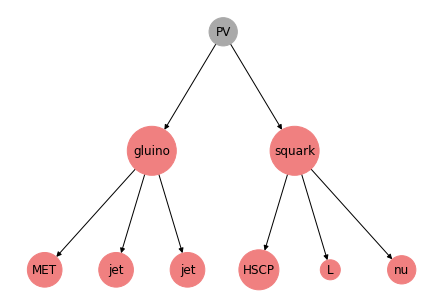

[(PV, gluino), (PV, squark), (gluino, MET), (gluino, jet), (gluino, jet), (squark, HSCP), (squark, L), (squark, nu)]


In [5]:
procString = output
T = Tree(procString)
T.draw()
output = str(T.edges)
print(output)

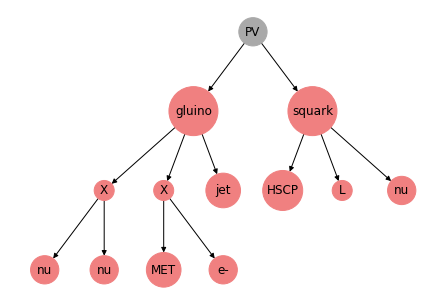

[(PV, gluino), (PV, squark), (gluino, X), (gluino, X), (gluino, jet), (squark, HSCP), (squark, L), (squark, nu), (X, nu), (X, nu), (X, MET), (X, e-)]


In [6]:
proc = '(PV > gluino(1),squark(2)), (gluino(1) > X(3),X(4),jet), (squark(2) > HSCP,L,nu), (X(3) > nu,nu), (X(4) > MET,e-)'
T = Tree(proc)
T.draw()
output = str(T.edges)
print(output)